# Fitting a Straight Line and a Parabola 

This notebook shows how to:

- Generate synthetic data for a linear and a quadratic relationship,
- Fit a **straight line** (degree 1 polynomial) and a **parabola** (degree 2 polynomial) using NumPy, and
- Plot the data and the fitted curves using Matplotlib.

We also compute simple goodness-of-fit metrics: Mean Squared Error (MSE) and $R^2$.


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
rng = np.random.default_rng(2025)

def r2_score(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - y_true.mean())**2)
    return float(1.0 - ss_res / ss_tot) if ss_tot > 0 else np.nan

def mse(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return float(np.mean((y_true - y_pred)**2))


## 1) Fit a Straight Line
We simulate data from a linear model $y = m x + b + \epsilon$ with Gaussian noise $\epsilon$. Then we fit a degree-1 polynomial using `numpy.polyfit`.

Estimated line: y = 2.182 x + -1.610
MSE = 5.190, R^2 = 0.918


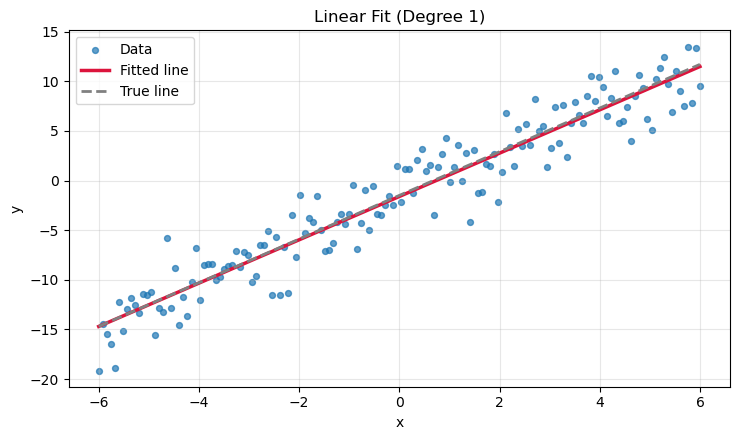

In [6]:
# --- Generate synthetic linear data ---
m_true, b_true = 2.2, -1.5
x_lin = np.linspace(-6, 6, 150)
noise_sigma = 2.0
y_lin = m_true * x_lin + b_true + rng.normal(0.0, noise_sigma, size=x_lin.shape)

# --- Fit line: degree 1 polyfit returns [slope, intercept] ---
coef_lin = np.polyfit(x_lin, y_lin, deg=1)
m_hat, b_hat = coef_lin
y_lin_hat = m_hat * x_lin + b_hat

print(f'Estimated line: y = {m_hat:.3f} x + {b_hat:.3f}')
print(f'MSE = {mse(y_lin, y_lin_hat):.3f}, R^2 = {r2_score(y_lin, y_lin_hat):.3f}')

# --- Plot ---
plt.figure(figsize=(7.5, 4.5))
plt.scatter(x_lin, y_lin, s=18, alpha=0.7, label='Data')
plt.plot(x_lin, y_lin_hat, color='crimson', lw=2.5, label='Fitted line')
plt.plot(x_lin, m_true * x_lin + b_true, '--', color='gray', lw=2, label='True line')
plt.title('Linear Fit (Degree 1)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('linear_fit.png', dpi=140)
plt.show()


## 2) Fit a Parabola
We now simulate data from a quadratic model $y = a x^2 + b x + c + \epsilon$ and fit a degree-2 polynomial (a parabola).

Estimated parabola: y = 0.998 x^2 + -0.576 x + 2.503
MSE = 2.539, R^2 = 0.959


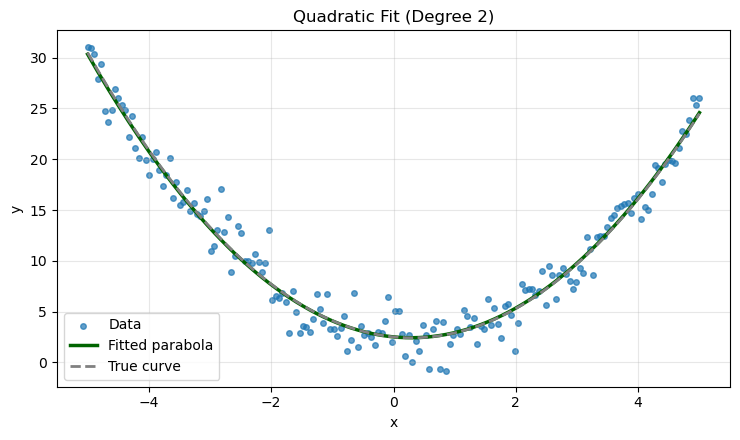

In [7]:
# --- Generate synthetic quadratic data ---
a_true, b_true_q, c_true = 1.0, -0.6, 2.5
x_quad = np.linspace(-5, 5, 180)
noise_sigma_q = 1.6
y_quad = a_true * x_quad**2 + b_true_q * x_quad + c_true + rng.normal(0.0, noise_sigma_q, size=x_quad.shape)

# --- Fit parabola: degree 2 polyfit returns [a, b, c] ---
coef_quad = np.polyfit(x_quad, y_quad, deg=2)
a_hat, b_hat_q, c_hat = coef_quad
y_quad_hat = a_hat * x_quad**2 + b_hat_q * x_quad + c_hat

print(f'Estimated parabola: y = {a_hat:.3f} x^2 + {b_hat_q:.3f} x + {c_hat:.3f}')
print(f'MSE = {mse(y_quad, y_quad_hat):.3f}, R^2 = {r2_score(y_quad, y_quad_hat):.3f}')

# --- Plot ---
plt.figure(figsize=(7.5, 4.5))
plt.scatter(x_quad, y_quad, s=16, alpha=0.7, label='Data')
plt.plot(x_quad, y_quad_hat, color='darkgreen', lw=2.5, label='Fitted parabola')
plt.plot(x_quad, a_true * x_quad**2 + b_true_q * x_quad + c_true, '--', color='gray', lw=2, label='True curve')
plt.title('Quadratic Fit (Degree 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('quadratic_fit.png', dpi=140)
plt.show()


## 3) Compare Fits on the Same Axes
This plot overlays the **fitted line** and **fitted parabola** on their respective datasets for a quick visual comparison.

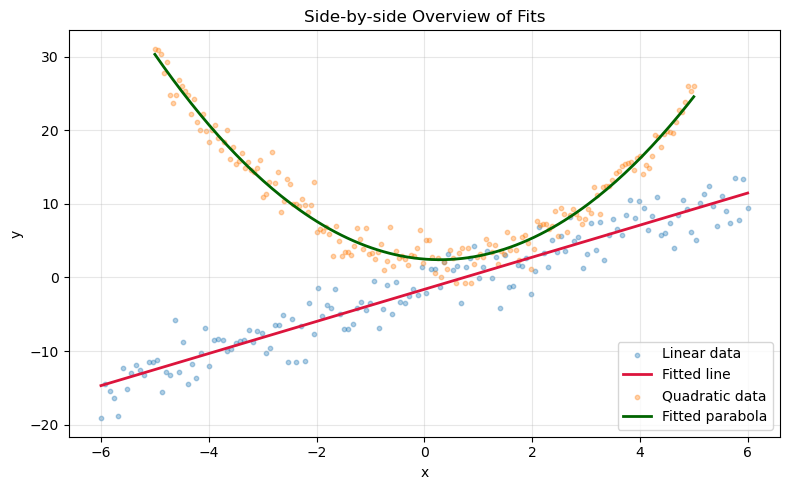

In [8]:
plt.figure(figsize=(8.0, 5.0))
# Linear dataset and fit
plt.scatter(x_lin, y_lin, s=10, alpha=0.35, color='tab:blue', label='Linear data')
plt.plot(x_lin, y_lin_hat, color='crimson', lw=2, label='Fitted line')
# Quadratic dataset and fit
plt.scatter(x_quad, y_quad, s=10, alpha=0.35, color='tab:orange', label='Quadratic data')
plt.plot(x_quad, y_quad_hat, color='darkgreen', lw=2, label='Fitted parabola')
plt.title('Side-by-side Overview of Fits')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('fits_overview.png', dpi=140)
plt.show()


### Exercise
Show an illustration of fitting a plane with your own data.

Estimated plane: z = 4.932 x + 6.005 y + -7.055
MSE = 4.268, R^2 = 0.991


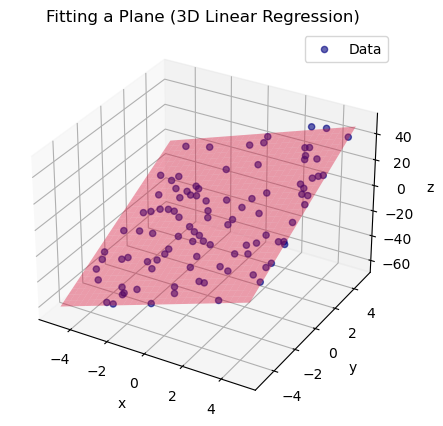

In [28]:
# --- Exercise: Fit a Plane (3D linear regression) ---
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
rng = np.random.default_rng(2025)  # reproducibility

# Generate synthetic 3D data: z = 2.5 x - 1.7 y + 4.0 + noise
a_true, b_true, c_true = 5,6,-7
n_points = 100
x_vals = rng.uniform(-5, 5, size=n_points)
y_vals = rng.uniform(-5, 5, size=n_points)
noise = rng.normal(0, 2.0, size=n_points)
z_vals = a_true * x_vals + b_true * y_vals + c_true + noise

# Build design matrix [x, y, 1]
X = np.c_[x_vals, y_vals, np.ones_like(x_vals)]

# Solve least squares: coef = [a, b, c]
coef_plane, *_ = np.linalg.lstsq(X, z_vals, rcond=None)
a_hat, b_hat, c_hat = coef_plane

# Predicted z
z_hat = a_hat * x_vals + b_hat * y_vals + c_hat

print(f"Estimated plane: z = {a_hat:.3f} x + {b_hat:.3f} y + {c_hat:.3f}")
print(f"MSE = {mse(z_vals, z_hat):.3f}, R^2 = {r2_score(z_vals, z_hat):.3f}")

# --- Plot 3D data and fitted plane ---
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_vals, y_vals, z_vals, color='navy', s=20, alpha=0.6, label='Data')

# Create grid for plane surface
xx, yy = np.meshgrid(np.linspace(-5, 5, 30), np.linspace(-5, 5, 30))
zz = a_hat * xx + b_hat * yy + c_hat
ax.plot_surface(xx, yy, zz, alpha=0.4, color='crimson')

ax.set_title("Fitting a Plane (3D Linear Regression)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend()
plt.show()
